# 🚀 Welcome to the Boosting and Stacking Practice Session!  📊✨



In this practice, we’ll dive into XGBoost, AdaBoost, and Stacking — three powerful techniques in ensemble learning used to boost model performance and robustness. You'll gain hands-on experience with each method by applying them to a real-world dataset and analyzing their impact on classification accuracy.




## **Introduction:**
- **Time Limit:** You have 60 minutes to complete the practice.
- **Objective:** Implement XGBoost, AdaBoost, and a simple stacking ensemble to classify data. You’ll preprocess the dataset, train each model, fine-tune hyperparameters, and evaluate their performances. Document your approach, hyperparameters, and any insights you gather along the way.
- **Presentation:** After completing the exercise, present your findings. Discuss each model’s accuracy, any differences in performance, and the benefits and challenges of each approach.
- **Ask for Help:** If you need assistance at any point, feel free to ask the instructor for guidance or clarification.

## **Why This Matters:**

Boosting algorithms like XGBoost and AdaBoost are widely used in machine learning due to their ability to create strong models from weak learners. Stacking adds another layer of prediction by combining multiple models, helping to leverage the strengths of each. Mastering these techniques will equip you with essential tools for improving accuracy in complex tasks and enhance your understanding of ensemble methods.



## **Recap** 📑

### XGBoost:
XGBoost, short for eXtreme Gradient Boosting, is a powerful implementation of gradient boosting machines. It's known for its speed, performance, and versatility. Key features of XGBoost include:

- **Optimized Performance**: XGBoost is optimized for both speed and performance, making it one of the most efficient implementations of gradient boosting.
  
- **Regularization**: It incorporates regularization techniques to prevent overfitting and improve generalization.
  
- **Flexibility**: XGBoost supports various objective functions and evaluation metrics, making it suitable for a wide range of tasks.

### AdaBoost:

AdaBoost, or Adaptive Boosting, combines multiple weak learners to create a strong overall model. It’s called "adaptive" because it adjusts the weights of each instance, assigning higher weights to those that were misclassified in previous rounds. While sensitive to noise, AdaBoost is effective for binary classification and can handle some multiclass problems, especially when the data is fairly clean.

More details about the implementation check the following link:

 https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

### Stacking:
Stacking, also known as stacked generalization, is an ensemble learning technique that combines the predictions of multiple base models to improve overall performance. Key aspects of stacking include:

- **Model Combination**: Stacking combines predictions from diverse base models using a meta-learner to generate a final prediction.
  
- **Diversity**: Stacking leverages the diversity of base models to capture different aspects of the data and improve overall robustness.
  
- **Performance Boost**: By leveraging the strengths of multiple models, stacking often leads to performance improvements over individual models.

In this notebook, we'll delve deeper into these concepts, exploring advanced techniques and practical implementations of XGBoost and stacking. Let's dive in and uncover the potential of these powerful ensemble learning methods!





Get ready to boost your model’s power and dive into the world of ensemble learning!

Happy coding! 💻🚀


### Dataset Overview

The dataset we'll be working with contains information about customers of a telecommunications company and whether they churned or not. Here's a brief overview of the dataset:

- **CustomerID**: Unique identifier for each customer.
- **Gender**: Gender of the customer (e.g., Male, Female).
- **SeniorCitizen**: Indicates if the customer is a senior citizen (1) or not (0).
- **Partner**: Whether the customer has a partner or not (Yes, No).
- **Dependents**: Whether the customer has dependents or not (Yes, No).
- **Tenure**: Number of months the customer has been with the company.
- **PhoneService**: Whether the customer has a phone service or not (Yes, No).
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service).
- **InternetService**: Type of internet service subscribed by the customer (DSL, Fiber optic, No).
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service).
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service).
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service).
- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service).
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service).
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service).
- **Contract**: Type of contract the customer has (Month-to-month, One year, Two year).
- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No).
- **PaymentMethod**: Payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- **MonthlyCharges**: Monthly charges incurred by the customer.
- **TotalCharges**: Total charges incurred by the customer.
- **Churn**: Whether the customer churned or not (Yes, No).

### Data Exploration

Before we proceed with modeling, let's explore the dataset to understand its structure and gain insights into the distribution of key variables. We'll check for any missing values and visualize the distribution of the target variable (Churn) to understand the imbalance in the dataset.


1. First step we will load the necessairy libraries to use for this practice :



In [9]:
# Cell 1: Import necessary libraries
# Import pandas for data manipulation
# Import train_test_split from sklearn.model_selection for splitting the dataset
# Import xgboost and other necessary modules for modeling

import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


2. Load the dataset



In [10]:
# use pandas to load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


3. Display some rows of your dataset

In [11]:
#display some rows to see the name of each column of your dataset

print(df.head())

print(df.columns)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

4. Data exploration

In [12]:
# Use pandas functions to explore the dataset (e.g., df.info(), df.describe())

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
# Check for missing values and handle them if necessary

# Count missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


<ipython-input-14-3f20f2d979e5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Churn'], palette="coolwarm")


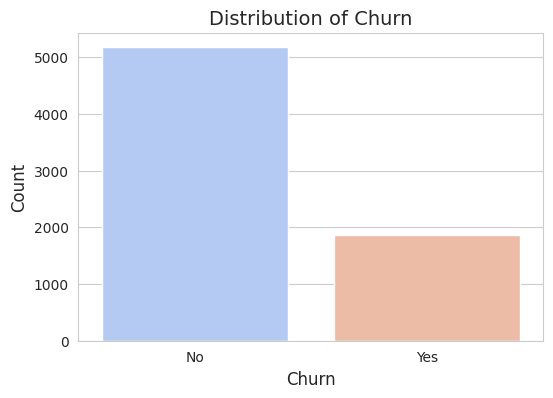

In [14]:
# Visualize the distribution of target variable 'Churn' (e.g., using seaborn's countplot)
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Create a countplot to show the distribution of 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Churn'], palette="coolwarm")

# Add title and labels
plt.title("Distribution of Churn", fontsize=14)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

5. Data preprocessing

In [15]:
# Perform necessary data preprocessing steps such as encoding categorical variables and scaling numerical features Hint: the previous practice (Decision Trees)
# Loop through each column in the dataframe
# Initialize the label encoder

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Loop through each column in the dataframe
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target variable
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

# Initialize the Standard Scaler
scaler = StandardScaler()

# Scale numerical features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

# Display processed data
print(X.head())


   customerID    gender  SeniorCitizen   Partner  Dependents    tenure  \
0    0.911890 -1.009559      -0.439916  1.034530   -0.654012 -1.277445   
1    0.216906  0.990532      -0.439916 -0.966622   -0.654012  0.066327   
2   -0.470701  0.990532      -0.439916 -0.966622   -0.654012 -1.236724   
3    0.990587  0.990532      -0.439916 -0.966622   -0.654012  0.514251   
4    1.470632 -1.009559      -0.439916 -0.966622   -0.654012 -1.236724   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0     -3.054010       0.062723        -1.183234       -0.918838      1.242550   
1      0.327438      -0.991588        -1.183234        1.407321     -1.029919   
2      0.327438      -0.991588        -1.183234        1.407321      1.242550   
3     -3.054010       0.062723        -1.183234        1.407321     -1.029919   
4      0.327438      -0.991588         0.172250       -0.918838     -1.029919   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Cont

In [16]:
# Split the dataset into features (X) and target variable (y)

# Define features (X) by dropping the target column 'Churn'
X = df.drop(columns=['Churn'])

# Define target variable (y)
y = df['Churn']

In [17]:
# Split the data into training and testing sets using train_test_split

from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the resulting sets
print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Testing set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")

Training set: X_train shape = (5634, 20), y_train shape = (5634,)
Testing set: X_test shape = (1409, 20), y_test shape = (1409,)


### 6. **AdaBoost**

- Create AdaBoost classifier with the following parameters : max_depth = 3, learning_rate = 0.1, n_estimators = 100

In [18]:
# Initialize an AdaBoost classifier (e.g., xgb.XGBClassifier)


from sklearn.ensemble import AdaBoostClassifier



In [19]:
# Train the XGBoost model on the training data (e.g., using .fit() method)

from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Display training completion message
print("XGBoost model training completed!")

XGBoost model training completed!


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [20]:
# Evaluate the model's performance on the testing data using appropriate metrics (e.g., accuracy_score, classification_report)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7764

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.59      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Confusion Matrix:
[[903 132]
 [183 191]]


## Understanding Hyperparameter Tuning

The code below may look complex at first glance, but it's aimed at helping us find the best combination of hyperparameters for our AdaBoost model.

### What are Hyperparameters?

Hyperparameters are settings that control the learning process of our machine learning model. They are not learned from the data, unlike model parameters, but rather set before the learning process begins.

### Why Tuning Hyperparameters?

Tuning hyperparameters is crucial for achieving optimal performance and preventing overfitting or underfitting of our model. By testing different combinations of hyperparameters, we can find the settings that result in the best performance on our dataset.

### The Code Breakdown:

- **max_depth, learning_rate, n_estimators:** These are all different hyperparameters that we're going to test. Each parameter controls a different aspect of the AdaBoost model's behavior.
  
- **Nested Loops:** The nested loops iterate through each combination of hyperparameter values. For example, the outer loop may iterate over max_depth values, while the inner loop may iterate over learning_rate values.

- **Model Training and Evaluation:** Inside the loops, we initialize an AdaBoost model with the current hyperparameter values, train it on the training data, and evaluate its performance on the testing data using an accuracy score.

- **Recording Results:** We keep track of the accuracy scores for each combination of hyperparameters. This allows us to compare the performance of different settings and identify the combination that yields the best results.

By understanding and running this code, we can identify the hyperparameter settings that optimize our model's performance and achieve better predictive accuracy.


To Do:

- Test the following values for max_depth : 3/5/7
- Test the following values for learning rate : 0.1/0.01/0.001
- Test the following values for number of estimators: 100/200/300
- Make nested loop to test all combinations of these values.

In [21]:
# Cell 6: Hyperparameter tuning - AdaBoost
# Test different values for the hyperparameters of AdaBoost and compare their performance scores.
# Define a list of hyperparameters and their respective values to test
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

max_depth_values = [3, 5, 7]  # Example values for max_depth
learning_rate_values = [0.01, 0.1, 1]  # Example values for learning_rate
n_estimators_values = [50, 100, 150]  # Example values for n_estimators


# Initialize lists to store the performance scores for each hyperparameter combination
accuracy_scores = []

# Loop through each hyperparameter combination
for max_depth in max_depth_values:
    for learning_rate in learning_rate_values:
        for n_estimators in n_estimators_values:
            # Initialize an AdaBoost classifier with the current hyperparameters
            # Removed base_estimator argument as it is not supported
            ada_classifier = AdaBoostClassifier(
                                                learning_rate=learning_rate,
                                                n_estimators=n_estimators)

            # Train the AdaBoost model on the training data
            ada_classifier.fit(X_train, y_train)

            # Perform prediction
            y_pred = ada_classifier.predict(X_test)

            # Evaluate the model's performance on the testing data using accuracy score
            accuracy = accuracy_score(y_test, y_pred)

            # Append the accuracy score and corresponding hyperparameters to the list
            accuracy_scores.append((max_depth, learning_rate, n_estimators, accuracy))

# Sort the accuracy scores list in descending order based on accuracy score
accuracy_scores.sort(key=lambda x: x[3], reverse=True)

# Get the hyperparameters with the highest accuracy score
best_hyperparameters = accuracy_scores[0]

# Print the hyperparameters with the highest accuracy score
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: (3, 1, 100, 0.7963094393186657)


In [22]:
# Cell 7: Model training with best hyperparameters - AdaBoost
# Train the AdaBoost model on the training data using the best hyperparameters
ada_best = AdaBoostClassifier(learning_rate=best_hyperparameters[1],
                              n_estimators=best_hyperparameters[2])

# Train model
ada_best.fit(X_train, y_train)

# Perform prediction
y_pred = ada_best.predict(X_test)

# Evaluate the AdaBoost model's performance on the testing data using accuracy score
accuracy_ada_best = accuracy_score(y_test, y_pred)

# Print the accuracy of the AdaBoost model with the best hyperparameters
print("AdaBoost Model Accuracy with Best Hyperparameters:", accuracy_ada_best)


AdaBoost Model Accuracy with Best Hyperparameters: 0.7963094393186657


7. XGBoost

Implement XGBoost classifier with the best hyperparameters values of AdaBoost and make a comparaison between them.


In [23]:
# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Perform the test
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the accuracy of the XGBoost model
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")

XGBoost Model Accuracy: 0.7764


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 8. Stacking

In [24]:
# Model training - Stacking
# Create a set of diverse base models (e.g., logistic regression, random forest, SVM)
# Import necessary libraries
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
import xgboost as xgb

base_models = [
     ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42))
]



In [25]:
# Initialize a stacking classifier with the base models and a meta-learner (e.g., another XGBoost model)
stacked_model = StackingClassifier(estimators=base_models, final_estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))



In [ ]:
# Train the stacked model on the base models' predictions and the corresponding true labels
stacked_model.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Model evaluation - Stacking
# Use the trained stacked model to make predictions on the testing data
stacked_model_predictions = stacked_model.predict(X_test)  # Fill in with the testing data (X_test)

# Evaluate the stacked model's performance on the testing data using appropriate metrics
stacked_model_accuracy = accuracy_score(y_test, stacked_model_predictions)  # Fill in with the true labels (y_test) and predictions (stacked_model_predictions)
print("Stacked Model Accuracy:", stacked_model_accuracy)
